# Propagação de doenças
Fernando Vilela Brandão - 2021421907

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Funções

In [17]:
def vizinhos(N):
  #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: 
      viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): 
      viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): 
      viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: 
      viz[k,3] = k+N-L
  return viz

In [18]:
def count_infected_neighbours(neighbours, lattice):
    return sum(lattice[i] == 1 for i in neighbours)

In [19]:
def plot_contagion_evolution(susceptible, infected, recovered, time_steps):
    time = np.arange(time_steps)

    fig, ax = plt.subplots()
    ax.plot(time, susceptible, 'orange', label='Susceptíveis')
    ax.plot(time, infected, 'red', label='Infectados')
    ax.plot(time, recovered, 'green', label='Recuperados com imunidade')

    ax.set_xlabel('Tempo')
    ax.set_ylabel('Indivíduos')
    ax.set_title('Evolução temporal de contágio')
    ax.legend()
    plt.show()


In [20]:
def sir_model(lattice_side, infection_prob, recovery_prob, time_steps):
    N = lattice_side ** 2
    lattice = np.zeros(N)
    neighbours = vizinhos(N)

    patient_zero = np.random.randint(N)
    lattice[patient_zero] = 1

    susceptible_counts = np.zeros(time_steps)
    infected_counts = np.zeros(time_steps)
    recovered_counts = np.zeros(time_steps)

    for t in range(time_steps):
        new_lattice = np.copy(lattice)

        for i in range(N):
            if lattice[i] == 0:  # Susceptible
                for neighbour in neighbours[i]:
                    if lattice[neighbour] == 1 and np.random.uniform() <= infection_prob:
                        new_lattice[i] = 1
                        break
                susceptible_counts[t] += 1

            elif lattice[i] == 1:  # Infected
                if np.random.uniform() < recovery_prob:
                    new_lattice[i] = 2
                infected_counts[t] += 1

            else:  # Recovered
                recovered_counts[t] += 1

        lattice = new_lattice

    return susceptible_counts, infected_counts, recovered_counts


In [21]:
def multiple_sir_samples(lattice_side, infection_prob, recovery_prob, time_steps, samples):
    cumulative_susceptible = np.zeros(time_steps)
    cumulative_infected = np.zeros(time_steps)
    cumulative_recovered = np.zeros(time_steps)

    for _ in range(samples):
        susceptible, infected, recovered = sir_model(lattice_side, infection_prob, recovery_prob, time_steps)
        cumulative_susceptible += susceptible
        cumulative_infected += infected
        cumulative_recovered += recovered

    avg_susceptible = cumulative_susceptible / samples
    avg_infected = cumulative_infected / samples
    avg_recovered = cumulative_recovered / samples

    plot_contagion_evolution(avg_susceptible, avg_infected, avg_recovered, time_steps)

# [1]
 - Lado quadrado(50)

 - Probabilidade contaminação(0.8)

 - Probabilidade recuperação(0.3)

- Tempo(200)

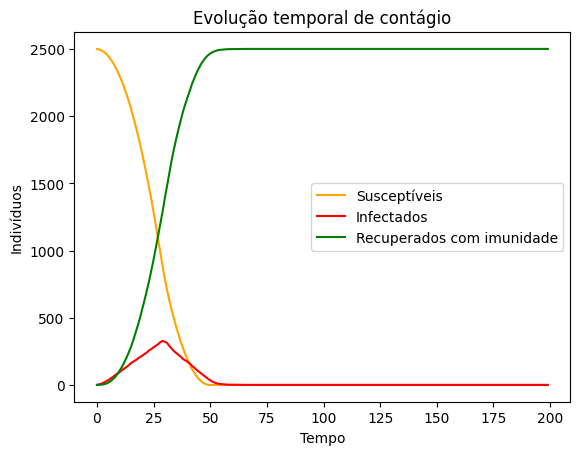

In [22]:
latticeSide = 50
Pc = 0.8
Pr = 0.3
time = 200
multiple_sir_samples(latticeSide,Pc,Pr,time,10)

# [2]
 - Lado quadrado(100)

 - Probabilidade contaminação(0.8)

 - Probabilidade recuperação(0.3)

- Tempo(200)

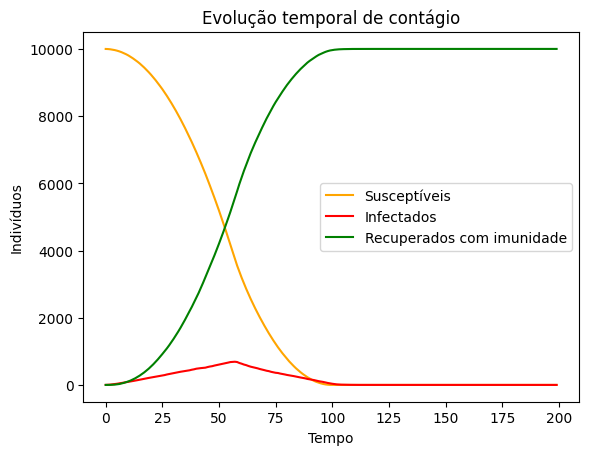

In [23]:
latticeSide = 100
Pc = 0.8
Pr = 0.3
time = 200
multiple_sir_samples(latticeSide,Pc,Pr,time,10)

# [3]
 - Lado quadrado(50)

 - Probabilidade contaminação(0.05)

 - Probabilidade recuperação(0.3)

- Tempo(200)

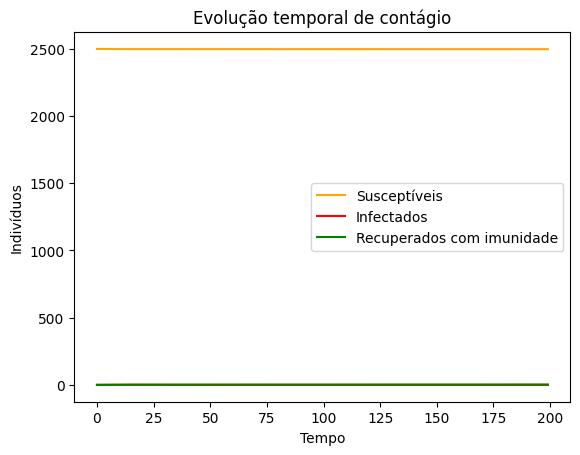

In [30]:
latticeSide = 50
Pc = 0.05
Pr = 0.3
time = 200
multiple_sir_samples(latticeSide,Pc,Pr,time,10)

# [4]
 - Lado quadrado(50)

 - Probabilidade contaminação(0.8)

 - Probabilidade recuperação(0.01)

- Tempo(800)

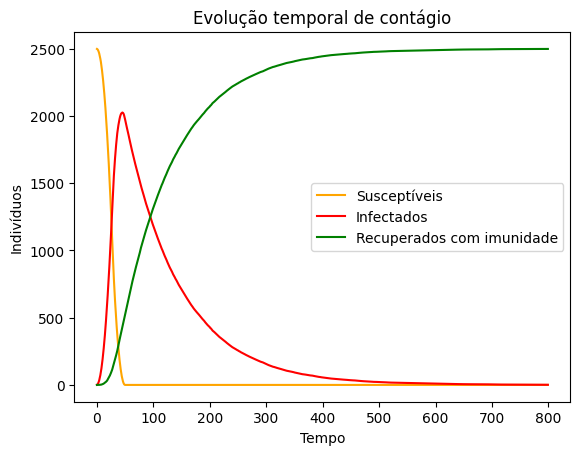

In [36]:
latticeSide = 50
Pc = 0.8
Pr = 0.01
time = 800
multiple_sir_samples(latticeSide,Pc,Pr,time,10)

# [5]
 - Lado quadrado(50)

 - Probabilidade contaminação(0.3)

 - Probabilidade recuperação(0.7)

- Tempo(200)

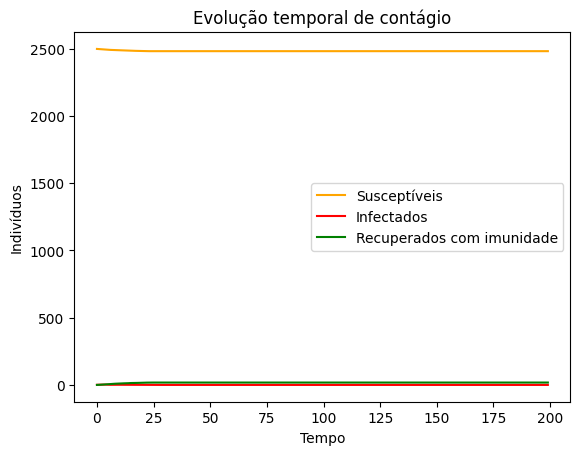

In [29]:
latticeSide = 50
Pc = 0.3
Pr = 0.7
time = 200
multiple_sir_samples(latticeSide,Pc,Pr,time,10)

# Conclusões

No estudo base ([1]), com um lado do quadrado de 50, uma probabilidade de contaminação de 0.8 e uma probabilidade de recuperação de 0.3, observou-se um pico de infectados em torno do tempo 25, com o número de suscetíveis caindo para zero por volta do tempo 50. Este comportamento indica uma rápida disseminação do contágio seguida por uma recuperação eficiente da população.

Quando os mesmos parâmetros foram mantidos, mas o tamanho do lado do quadrado foi dobrado para 100 ([2]), o aumento e o decréscimo do número de infectados ocorreram mais lentamente. O pico de infectados foi atingido aproximadamente no tempo 50. Esse resultado sugere que, em uma população maior, a propagação da doença ocorre de forma mais gradual, provavelmente devido ao maior número de interações necessárias para que o contágio se espalhe por toda a população.

Ao reduzir drasticamente a taxa de contaminação para 0.05 ([3]), observou-se que poucas infecções ocorreram e a população suscetível permaneceu quase constante, próxima da população total. A população de recuperados e infectados foi praticamente nula, indicando que uma baixa taxa de contaminação impede a disseminação significativa da doença.

Em um cenário onde a probabilidade de contaminação foi aumentada para 0.8 e a probabilidade de recuperação foi reduzida para 0.01 ([4]), o pico de infectados foi significativamente maior e a estabilização do modelo, com o número de suscetíveis e infectados chegando a zero, ocorreu após um período muito mais longo, necessário para que todos os indivíduos se recuperassem ou fossem infectados.

Por fim, ao ajustar a probabilidade de contaminação para 0.3 e a probabilidade de recuperação para 0.7 ([5]), não houve muitas contaminações. A população suscetível manteve-se muito próxima da população total, enquanto as populações de recuperados e infectados permaneceram quase nulas. Esse cenário demonstra que uma alta taxa de recuperação e uma taxa moderada de contaminação resultam em uma baixa prevalência da doença.

É evidente que a taxa de contaminação e a taxa de recuperação são fatores cruciais na determinação do comportamento da doença. Uma alta taxa de contaminação combinada com uma baixa taxa de recuperação pode resultar em surtos severos e prolongados, enquanto o inverso pode praticamente suprimir a disseminação da doença. Além disso, o tamanho da população influencia a velocidade com que a doença se espalha, com populações maiores exibindo uma disseminação mais lenta mas potencialmente mais prolongada.